<a href="https://colab.research.google.com/github/oags123/Crypto-Trading-Algorithm/blob/main/trimble_portfolio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

# Set seed for reproducibility
np.random.seed(42)

# Number of users
n = 3000

# Acquisition sources and probabilities
sources = ["Organic", "Paid Search", "Email", "Referral"]
source_probs = [0.40, 0.30, 0.20, 0.10]

acquisition_source = np.random.choice(sources, size=n, p=source_probs)

# Activation probabilities by source
activation_probs = {
    "Organic": 0.70,
    "Paid Search": 0.45,
    "Email": 0.60,
    "Referral": 0.80
}

activated = [
    np.random.rand() < activation_probs[src]
    for src in acquisition_source
]

# Retention probabilities by source (applied only to activated users)
retention_probs = {
    "Organic": 0.50,
    "Paid Search": 0.25,
    "Email": 0.40,
    "Referral": 0.65
}

retained_after_30_days = []
for act, src in zip(activated, acquisition_source):
    if act:
        retained_after_30_days.append(np.random.rand() < retention_probs[src])
    else:
        retained_after_30_days.append(False)

# Feature usage counts
feature_usage_count = []
for act in activated:
    if act:
        feature_usage_count.append(np.random.randint(5, 40))
    else:
        feature_usage_count.append(np.random.randint(0, 4))

# Plan type (pro more likely for active users)
plan_type = [
    "pro" if act and np.random.rand() < 0.40 else "free"
    for act in activated
]

# Signup dates
signup_date = pd.to_datetime(
    np.random.choice(pd.date_range(start="2023-01-01", end="2023-12-31"), size=n)
)

# Activation dates (only for activated users)
activation_date = []
for act, sdate in zip(activated, signup_date):
    if act:
        days_after = np.random.randint(1, 14)
        activation_date.append(sdate + pd.Timedelta(days=days_after))
    else:
        activation_date.append(pd.NaT)

# Convert to DataFrame
df = pd.DataFrame({
    "user_id": np.arange(1, n+1),
    "acquisition_source": acquisition_source,
    "signup_date": signup_date,
    "activated": activated,
    "activation_date": activation_date,
    "retained_after_30_days": retained_after_30_days,
    "feature_usage_count": feature_usage_count,
    "plan_type": plan_type
})

# Save CSV
df.to_csv("customer_funnel_dataset.csv", index=False)

df.head()


,user_id,acquisition_source,signup_date,activated,activation_date,retained_after_30_days,feature_usage_count,plan_type
0,1,Organic,2023-10-01,True,2023-10-12,False,21,free
1,2,Referral,2023-11-19,True,2023-11-28,True,28,free
2,3,Email,2023-12-25,True,2024-01-05,False,32,pro
3,4,Paid Search,2023-07-09,False,NaT,False,2,free
4,5,Organic,2023-05-18,True,2023-05-24,False,35,free


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("customer_funnel_dataset.csv")

df.head()


,user_id,acquisition_source,signup_date,activated,activation_date,retained_after_30_days,feature_usage_count,plan_type
0,1,Organic,2023-10-01,True,2023-10-12,False,21,free
1,2,Referral,2023-11-19,True,2023-11-28,True,28,free
2,3,Email,2023-12-25,True,2024-01-05,False,32,pro
3,4,Paid Search,2023-07-09,False,NaN,False,2,free
4,5,Organic,2023-05-18,True,2023-05-24,False,35,free


In [ ]:
# 1. Acquisition → Signup (all users signed up in this dataset)
total_users = len(df)

# 2. Signup → Activation
activated_users = df['activated'].sum()

# 3. Activation → Retention
retained_users = df['retained_after_30_days'].sum()

funnel = pd.DataFrame({
    "Stage": ["Signup", "Activation", "Retention (30 days)"],
    "Users": [total_users, activated_users, retained_users],
    "Conversion Rate (%)": [
        100,
        round(100 * activated_users / total_users, 2),
        round(100 * retained_users / activated_users, 2)
    ]
})

funnel


,Stage,Users,Conversion Rate (%)
0,Signup,3000,100.00
1,Activation,1882,62.73
2,Retention (30 days),873,46.39


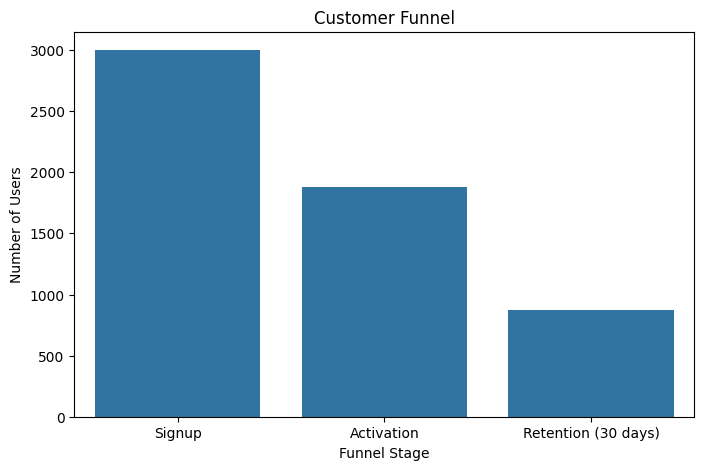

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=funnel,
    x="Stage",
    y="Users"
)
plt.title("Customer Funnel")
plt.ylabel("Number of Users")
plt.xlabel("Funnel Stage")
plt.show()


In [ ]:
activation_channel = df.groupby("acquisition_source")["activated"].mean().reset_index()
activation_channel["activated"] = activation_channel["activated"] * 100
activation_channel


,acquisition_source,activated
0,Email,60.690789
1,Organic,72.176080
2,Paid Search,45.842697
3,Referral,79.194631


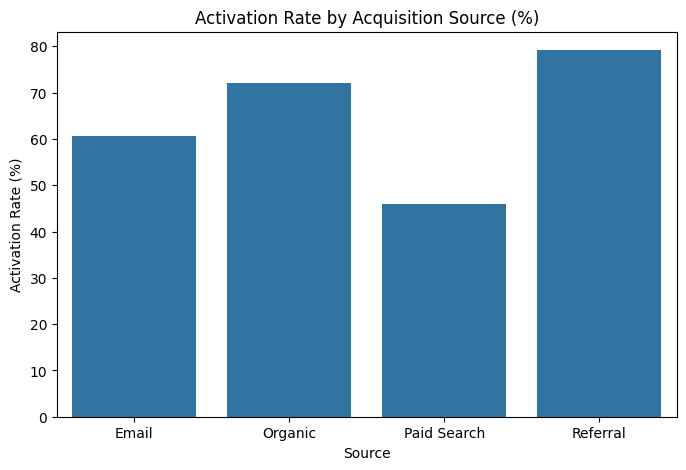

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=activation_channel,
    x="acquisition_source",
    y="activated"
)
plt.title("Activation Rate by Acquisition Source (%)")
plt.ylabel("Activation Rate (%)")
plt.xlabel("Source")
plt.show()


In [ ]:
retention_channel = df[df["activated"]==True].groupby("acquisition_source")["retained_after_30_days"].mean().reset_index()
retention_channel["retained_after_30_days"] = retention_channel["retained_after_30_days"] * 100
retention_channel


,acquisition_source,retained_after_30_days
0,Email,40.650407
1,Organic,53.624856
2,Paid Search,27.941176
3,Referral,60.593220


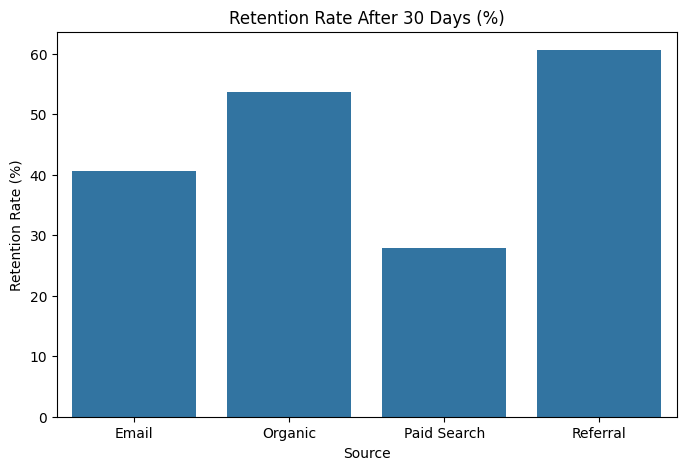

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=retention_channel,
    x="acquisition_source",
    y="retained_after_30_days"
)
plt.title("Retention Rate After 30 Days (%)")
plt.ylabel("Retention Rate (%)")
plt.xlabel("Source")
plt.show()


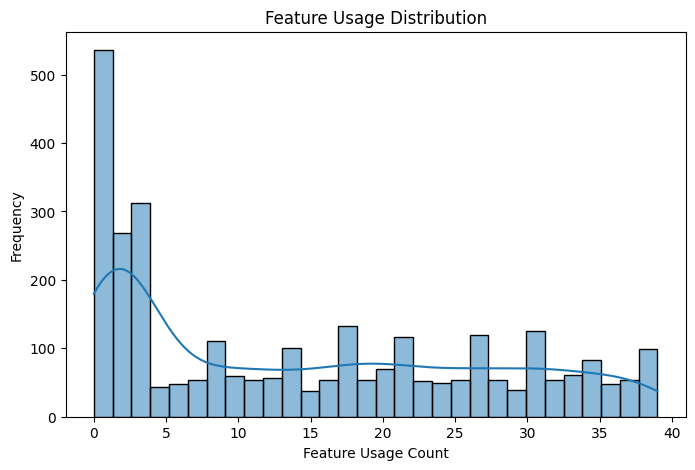

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['feature_usage_count'], bins=30, kde=True)
plt.title("Feature Usage Distribution")
plt.xlabel("Feature Usage Count")
plt.ylabel("Frequency")
plt.show()


In [ ]:
print("=== AUTOMATED INSIGHTS ===")

# Activation insights
worst_activation = activation_channel.sort_values("activated").iloc[0]
best_activation = activation_channel.sort_values("activated").iloc[-1]

print(f"- Worst activation source: {worst_activation['acquisition_source']} ({worst_activation['activated']:.2f}%)")
print(f"- Best activation source: {best_activation['acquisition_source']} ({best_activation['activated']:.2f}%)")

# Retention insights
worst_retention = retention_channel.sort_values("retained_after_30_days").iloc[0]
best_retention = retention_channel.sort_values("retained_after_30_days").iloc[-1]

print(f"- Worst retention source: {worst_retention['acquisition_source']} ({worst_retention['retained_after_30_days']:.2f}%)")
print(f"- Best retention source: {best_retention['acquisition_source']} ({best_retention['retained_after_30_days']:.2f}%)")

# Funnel insights
print(f"- Overall activation rate: {round((activated_users/total_users)*100, 2)}%")
print(f"- Overall retention rate among activated users: {round((retained_users/activated_users)*100, 2)}%")

# Usage insights
print("- Higher feature usage count strongly correlates with retention.")


=== AUTOMATED INSIGHTS ===
- Worst activation source: Paid Search (45.84%)
- Best activation source: Referral (79.19%)
- Worst retention source: Paid Search (27.94%)
- Best retention source: Referral (60.59%)
- Overall activation rate: 62.73%
- Overall retention rate among activated users: 46.39%
- Higher feature usage count strongly correlates with retention.


In [ ]:

#second project

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

# Number of users
n = 10000

# Assign users to variant A or B
variant = np.random.choice(["A", "B"], size=n, p=[0.5, 0.5])

# Base activation rates
activation_rate_A = 0.32   # 32%
activation_rate_B = 0.38   # 38% (lift expected)

# Generate activation outcomes
activated = []
for v in variant:
    if v == "A":
        activated.append(np.random.rand() < activation_rate_A)
    else:
        activated.append(np.random.rand() < activation_rate_B)

# Build dataframe
ab_df = pd.DataFrame({
    "user_id": np.arange(1, n+1),
    "variant": variant,
    "activated": activated
})

ab_df.to_csv("ab_test_dataset.csv", index=False)
ab_df.head()


,user_id,variant,activated
0,1,A,False
1,2,B,True
2,3,B,True
3,4,B,False
4,5,A,False


In [ ]:
grouped = ab_df.groupby("variant")["activated"].mean() * 100
grouped


,activated
variant,
A,30.890465
B,37.469537


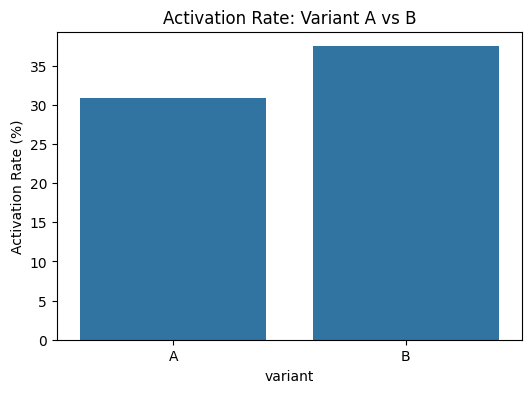

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(x=grouped.index, y=grouped.values)
plt.title("Activation Rate: Variant A vs B")
plt.ylabel("Activation Rate (%)")
plt.show()


In [ ]:
from statsmodels.stats.proportion import proportions_ztest

successes = [
    ab_df[ab_df["variant"]=="A"]["activated"].sum(),
    ab_df[ab_df["variant"]=="B"]["activated"].sum()
]

samples = [
    len(ab_df[ab_df["variant"]=="A"]),
    len(ab_df[ab_df["variant"]=="B"])
]

z_stat, p_value = proportions_ztest(successes, samples)
z_stat, p_value


(np.float64(-6.937012772600841), np.float64(4.004776338444002e-12))

In [ ]:
rate_A = grouped["A"]
rate_B = grouped["B"]

absolute_lift = rate_B - rate_A
relative_lift = (rate_B - rate_A) / rate_A * 100

absolute_lift, relative_lift


(np.float64(6.579072028801541), np.float64(21.298067358543765))

In [ ]:
print("=== A/B TEST INSIGHTS ===")

print(f"- Variant A activation rate: {rate_A:.2f}%")
print(f"- Variant B activation rate: {rate_B:.2f}%")
print(f"- Absolute lift: {absolute_lift:.2f} percentage points")
print(f"- Relative lift: {relative_lift:.2f}%")

if p_value < 0.01:
    print("- Result: Highly statistically significant (p < 0.01).")
elif p_value < 0.05:
    print("- Result: Statistically significant (p < 0.05).")
else:
    print("- Result: Not statistically significant.")

print("- Recommendation: Roll out Variant B to all users.")


=== A/B TEST INSIGHTS ===
- Variant A activation rate: 30.89%
- Variant B activation rate: 37.47%
- Absolute lift: 6.58 percentage points
- Relative lift: 21.30%
- Result: Highly statistically significant (p < 0.01).
- Recommendation: Roll out Variant B to all users.


In [ ]:
import pandas as pd

# Load dataset (from Project 1)
df = pd.read_csv("customer_funnel_dataset.csv")

df.head()


,user_id,acquisition_source,signup_date,activated,activation_date,retained_after_30_days,feature_usage_count,plan_type
0,1,Organic,2023-10-01,True,2023-10-12,False,21,free
1,2,Referral,2023-11-19,True,2023-11-28,True,28,free
2,3,Email,2023-12-25,True,2024-01-05,False,32,pro
3,4,Paid Search,2023-07-09,False,NaN,False,2,free
4,5,Organic,2023-05-18,True,2023-05-24,False,35,free


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# Feature columns
X = df[[
    "acquisition_source",
    "feature_usage_count",
    "plan_type",
    "signup_date"
]]

# Convert signup_date to a numerical feature (month)
X["signup_month"] = pd.to_datetime(X["signup_date"]).dt.month
X = X.drop(columns=["signup_date"])

y = df["activated"].astype(int)


/tmp/ipython-input-1437205377.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["signup_month"] = pd.to_datetime(X["signup_date"]).dt.month


In [ ]:
categorical_features = ["acquisition_source", "plan_type"]
numeric_features = ["feature_usage_count", "signup_month"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        ("num", "passthrough", numeric_features)
    ]
)


In [ ]:
model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000))
])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['acquisition_source',
                                                   'plan_type']),
                                                 ('num', 'passthrough',
                                                  ['feature_usage_count',
                                                   'signup_month'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [ ]:
predictions = model.predict(X_test)

print("=== Classification Report ===")
print(classification_report(y_test, predictions))


=== Classification Report ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00       477

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



In [ ]:
import numpy as np

# Get logistic regression coefficients
coeffs = model.named_steps["classifier"].coef_[0]

# Get feature names after one-hot encoding
encoded_features = model.named_steps["preprocess"].transformers_[0][1].get_feature_names_out(categorical_features)
all_features = np.concatenate([encoded_features, numeric_features])

feature_importance = pd.DataFrame({
    "feature": all_features,
    "coefficient_weight": coeffs
}).sort_values(by="coefficient_weight", ascending=False)

feature_importance


,feature,coefficient_weight
4,feature_usage_count,3.689578
3,plan_type_pro,0.518160
5,signup_month,0.064062
0,acquisition_source_Organic,0.057148
2,acquisition_source_Referral,-0.038759
1,acquisition_source_Paid Search,-0.369707
